In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import time as time
from importlib import reload
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, make_scorer
from sklearn.feature_selection import SelectKBest, chi2, f_classif

'''install extra modeules if needed'''
# !pip install xgboost
from xgboost import XGBClassifier
# !pip install lightgbm
# !pip install catboost
import lightgbm as lgb
import catboost as cb
# !pip install rgf_python
from rgf.sklearn import RGFClassifier, FastRGFClassifier

# import functions from scripts
import sys
path = os.getcwd()
sys.path.append(path+'/scripts')
import param_grids
from make_model_6 import make_model

In [10]:
data = path + '/dataset/bank/bank-additional/bank-additional-full.csv'
df_orig = pd.read_csv(data, sep=';')
df = df_orig.copy()
df = df.drop_duplicates()
df = df.drop('duration', axis=1)    # drop duration column
df_copy = df.copy()

## Base Models

In [3]:
models = [LogisticRegression(), SGDClassifier(), SVC(), KNeighborsClassifier() , 
          DecisionTreeClassifier(), GaussianNB(), ComplementNB()]
model_names = ['Logistic Regression', 'SGD Classifier', 'SVC', 
               'KNN', 'Decision Tree', 'Gaussian NB', 'Complement NB']
import param_grids
reload(param_grids)
params = [param_grids.param_lr, param_grids.param_sgd, param_grids.param_svc, 
               param_grids.param_knn, param_grids.param_dt, param_grids.param_nb, param_grids.param_cnb]

Logistic Regression
Tuned Hyperparameters : {'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Accuracy : 0.7923647223560344
Training Time : 2 minutes
Test Score : 0.7913951957064576


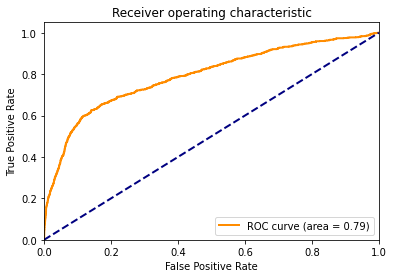

Confusion Matrix:
[[6601  664]
 [ 443  528]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      7265
           1       0.44      0.54      0.49       971

    accuracy                           0.87      8236
   macro avg       0.69      0.73      0.71      8236
weighted avg       0.88      0.87      0.87      8236

#########################################################
SGD Classifier
Tuned Hyperparameters : {'classifier__alpha': 0.01, 'classifier__loss': 'log', 'classifier__penalty': 'none'}
Accuracy : 0.790171549879529
Training Time : 1 minutes
Test Score : 0.7916319302441129


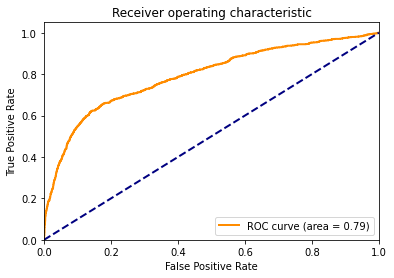

Confusion Matrix:
[[6665  600]
 [ 480  491]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7265
           1       0.45      0.51      0.48       971

    accuracy                           0.87      8236
   macro avg       0.69      0.71      0.70      8236
weighted avg       0.88      0.87      0.87      8236

#########################################################
SVC
Tuned Hyperparameters : {'classifier__C': 1, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
Accuracy : 0.7701345732730539
Training Time : 149 minutes
Test Score : 0.7745749941702348


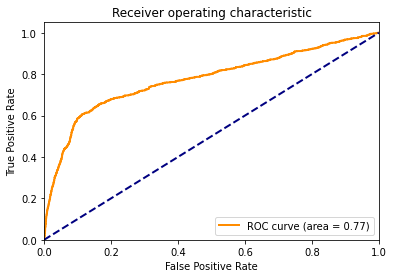

Confusion Matrix:
[[6633  632]
 [ 449  522]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      7265
           1       0.45      0.54      0.49       971

    accuracy                           0.87      8236
   macro avg       0.69      0.73      0.71      8236
weighted avg       0.88      0.87      0.87      8236

#########################################################
KNN
Tuned Hyperparameters : {'classifier__algorithm': 'auto', 'classifier__leaf_size': 10, 'classifier__n_neighbors': 7, 'classifier__p': 2, 'classifier__weights': 'uniform'}
Accuracy : 0.7522788426530509
Training Time : 3 minutes
Test Score : 0.7442875743427959


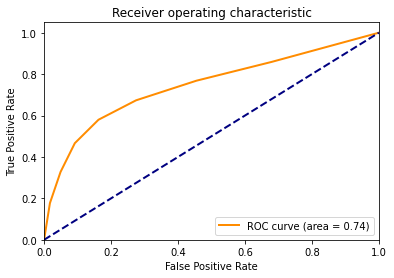

Confusion Matrix:
[[6084 1181]
 [ 408  563]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.88      7265
           1       0.32      0.58      0.41       971

    accuracy                           0.81      8236
   macro avg       0.63      0.71      0.65      8236
weighted avg       0.86      0.81      0.83      8236

#########################################################
Decision Tree
Tuned Hyperparameters : {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 100}
Accuracy : 0.7868687077306304
Training Time : 3 minutes
Test Score : 0.7761185175314684


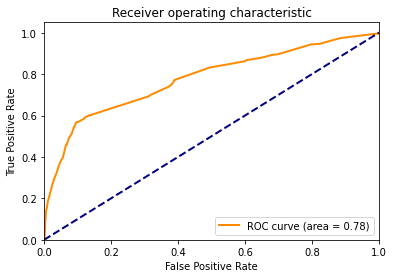

Confusion Matrix:
[[6702  563]
 [ 486  485]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7265
           1       0.46      0.50      0.48       971

    accuracy                           0.87      8236
   macro avg       0.70      0.71      0.70      8236
weighted avg       0.88      0.87      0.87      8236

#########################################################
Gaussian NB
Tuned Hyperparameters : {'classifier__var_smoothing': 0.01}
Accuracy : 0.7739236538470147
Training Time : 0 minutes
Test Score : 0.7763986297748258


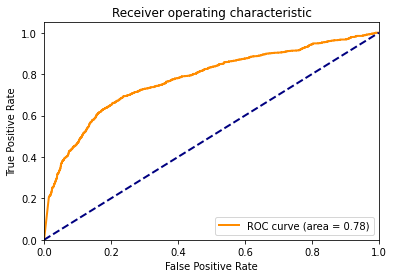

Confusion Matrix:
[[6184 1081]
 [ 407  564]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      7265
           1       0.34      0.58      0.43       971

    accuracy                           0.82      8236
   macro avg       0.64      0.72      0.66      8236
weighted avg       0.87      0.82      0.84      8236

#########################################################
Complement NB
Tuned Hyperparameters : {'classifier__alpha': 0.001}
Accuracy : 0.7731317166513435
Training Time : 0 minutes
Test Score : 0.7778963655578183


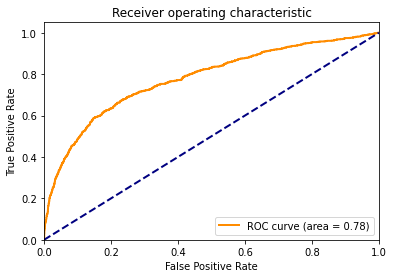

Confusion Matrix:
[[5658 1607]
 [ 328  643]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.85      7265
           1       0.29      0.66      0.40       971

    accuracy                           0.77      8236
   macro avg       0.62      0.72      0.63      8236
weighted avg       0.87      0.77      0.80      8236

#########################################################


In [4]:
# reload(param_grids)
# import make_model_6
# reload(make_model_6)
# from make_model_6 import make_model

random_state = 42
folds = 5
resampling = [0.2, 0.5]     # over size for SMOTE and under size for RandomUnderSampler
# resampling = None                            # Try None for no resampling

df = df_copy.copy()

for model, model_name, parameters in zip(models, model_names, params):
        print(model_name)
        clf_grid, time, test_score, metrics_df = make_model(df, model, parameters, 
                                                            test_size=0.2, folds=folds,
                                                            resampling=resampling)

        # save the model to disk
        pickle.dump(clf_grid, open(f'pres_models_2/{model_name}.pkl', 'wb'))

        info_file = f'pres_models_2/{model_name}_info.txt'

        with open(info_file, 'w') as f:
                # Write the tuned hyperparameters and accuracy to file
                f.write(f"Tuned Hyperparameters: {clf_grid.best_params_}\n")
                f.write(f"Accuracy: {clf_grid.best_score_}\n")
                # Write training time in minutes to file
                f.write(f"Training Time: {time} minutes\n")
                f.write(f"Test Score: {test_score}\n")
                f.write(f"Metrics: {metrics_df}\n")

        metrics_file = f'pres_models_2/{model_name}_metrics.csv'
        # Save the metrics dataframe to a CSV file
        metrics_df.to_csv(metrics_file, index=False)

## Decision Trees

In [15]:
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_jobs=-1),
    AdaBoostClassifier(),
    XGBClassifier(n_jobs=-1),
    BaggingClassifier(n_jobs=-1),
    lgb.LGBMClassifier(n_jobs=-1),
    cb.CatBoostClassifier(silent=True),
    RGFClassifier(),
    ExtraTreesClassifier()
]
model_names = ['DecisionTree', 'RandomForest', 'AdaBoost', 'XGBoost', 
               'BaggingClassifier', 'LGBMClassifier', 'CatBoostClassifier', 
                'RGFClassifier', 
                'ExtraTreesClassifier'
                ]

import param_grids
reload(param_grids)
params = [param_grids.param_dt, param_grids.param_rf, param_grids.param_ada,
                param_grids.param_xgb, param_grids.param_bag, param_grids.param_lgbm,
                param_grids.param_cat, param_grids.param_rgf,
                param_grids.param_extra,
                ]

DecisionTree
Tuned Hyperparameters : {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 15, 'classifier__min_samples_split': 100}
Accuracy : 0.7852221866493203
Training Time : 3 minutes
Test Score : 0.7851629818061711


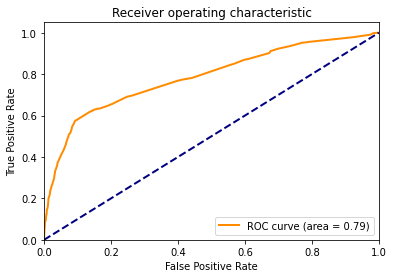

Confusion Matrix:
[[6702  563]
 [ 472  499]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7265
           1       0.47      0.51      0.49       971

    accuracy                           0.87      8236
   macro avg       0.70      0.72      0.71      8236
weighted avg       0.88      0.87      0.88      8236

#########################################################
RandomForest
Tuned Hyperparameters : {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2}
Accuracy : 0.799685809815917
Training Time : 1 minutes
Test Score : 0.7960784994715999


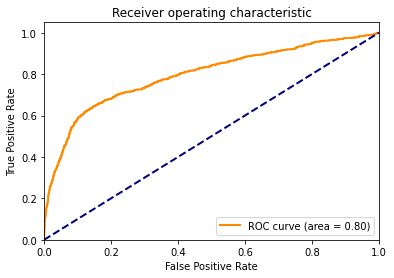

Confusion Matrix:
[[6644  621]
 [ 440  531]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      7265
           1       0.46      0.55      0.50       971

    accuracy                           0.87      8236
   macro avg       0.70      0.73      0.71      8236
weighted avg       0.88      0.87      0.88      8236

#########################################################
AdaBoost
Tuned Hyperparameters : {'classifier__base_estimator': DecisionTreeClassifier(max_depth=1), 'classifier__n_estimators': 300}
Accuracy : 0.792491652103233
Training Time : 2 minutes
Test Score : 0.7920364344376456


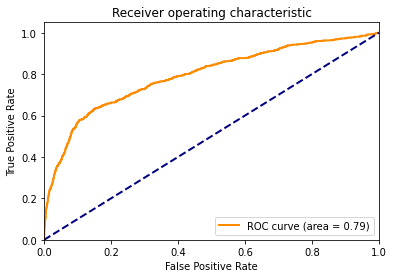

Confusion Matrix:
[[6706  559]
 [ 490  481]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7265
           1       0.46      0.50      0.48       971

    accuracy                           0.87      8236
   macro avg       0.70      0.71      0.70      8236
weighted avg       0.88      0.87      0.87      8236

#########################################################
XGBoost
[20:59:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[20:59:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[20:59:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { 

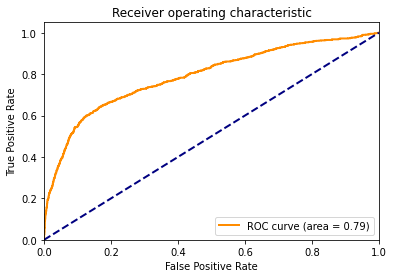

Confusion Matrix:
[[6586  679]
 [ 443  528]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      7265
           1       0.44      0.54      0.48       971

    accuracy                           0.86      8236
   macro avg       0.69      0.73      0.70      8236
weighted avg       0.88      0.86      0.87      8236

#########################################################
BaggingClassifier
Tuned Hyperparameters : {'classifier__base_estimator': LogisticRegression(C=1, solver='liblinear'), 'classifier__n_estimators': 300}
Accuracy : 0.790845656644692
Training Time : 2 minutes
Test Score : 0.7922278775472884


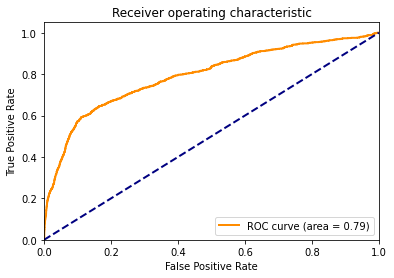

Confusion Matrix:
[[6617  648]
 [ 451  520]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      7265
           1       0.45      0.54      0.49       971

    accuracy                           0.87      8236
   macro avg       0.69      0.72      0.70      8236
weighted avg       0.88      0.87      0.87      8236

#########################################################
LGBMClassifier
Tuned Hyperparameters : {'classifier__boosting_type': 'dart', 'classifier__reg_alpha': 1e-06, 'classifier__reg_lambda': 1.0}
Accuracy : 0.8044713674941552
Training Time : 4 minutes
Test Score : 0.803023043342975


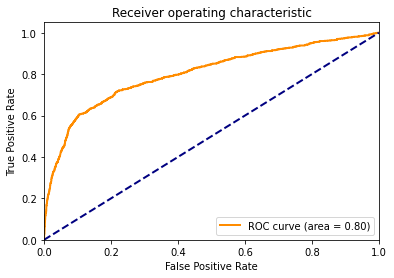

Confusion Matrix:
[[6684  581]
 [ 435  536]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7265
           1       0.48      0.55      0.51       971

    accuracy                           0.88      8236
   macro avg       0.71      0.74      0.72      8236
weighted avg       0.88      0.88      0.88      8236

#########################################################
CatBoostClassifier
Tuned Hyperparameters : {'classifier__depth': 4, 'classifier__l2_leaf_reg': 5}
Accuracy : 0.8023383086025909
Training Time : 7 minutes
Test Score : 0.8049407348551916


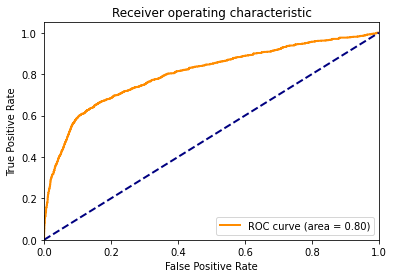

Confusion Matrix:
[[6756  509]
 [ 486  485]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7265
           1       0.49      0.50      0.49       971

    accuracy                           0.88      8236
   macro avg       0.71      0.71      0.71      8236
weighted avg       0.88      0.88      0.88      8236

#########################################################
RGFClassifier
Tuned Hyperparameters : {'classifier__algorithm': 'RGF', 'classifier__max_leaf': 1000}
Accuracy : 0.7973738295474391
Training Time : 6 minutes
Test Score : 0.7948196245843855


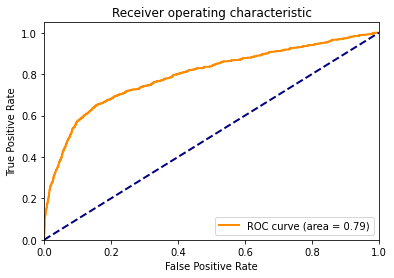

Confusion Matrix:
[[6735  530]
 [ 497  474]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7265
           1       0.47      0.49      0.48       971

    accuracy                           0.88      8236
   macro avg       0.70      0.71      0.70      8236
weighted avg       0.88      0.88      0.88      8236

#########################################################
ExtraTreesClassifier
Tuned Hyperparameters : {'classifier__class_weight': None, 'classifier__max_depth': 12, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Accuracy : 0.7983769882477956
Training Time : 45 minutes
Test Score : 0.7941819297834021


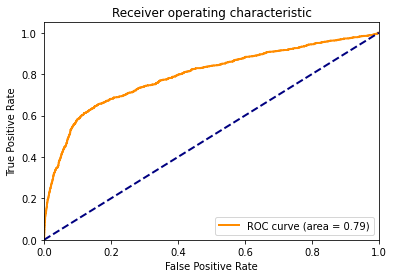

Confusion Matrix:
[[6624  641]
 [ 433  538]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      7265
           1       0.46      0.55      0.50       971

    accuracy                           0.87      8236
   macro avg       0.70      0.73      0.71      8236
weighted avg       0.88      0.87      0.87      8236

#########################################################


In [16]:
import make_model_6
reload(make_model_6)
from make_model_6 import make_model

random_state = 42
folds = 5
resampling = [0.2, 0.5]     # over size for SMOTE and under size for RandomUnderSampler
# resampling = None                            # Try None for no resampling

df = df_copy.copy()

for model, model_name, parameters in zip(models, model_names, params):
        print(model_name)
        clf_grid, time, test_score, metrics_df = make_model(df, model, parameters, 
                                                            test_size=0.2, folds=folds,
                                                            resampling=resampling)

        # save the model to disk
        pickle.dump(clf_grid, open(f'pres_models_2/{model_name}.pkl', 'wb'))

        info_file = f'pres_models_2/{model_name}_info.txt'

        with open(info_file, 'w') as f:
                # Write the tuned hyperparameters and accuracy to file
                f.write(f"Tuned Hyperparameters: {clf_grid.best_params_}\n")
                f.write(f"Accuracy: {clf_grid.best_score_}\n")
                # Write training time in minutes to file
                f.write(f"Training Time: {time} minutes\n")
                f.write(f"Test Score: {test_score}\n")
                f.write(f"Metrics: {metrics_df}\n")

        metrics_file = f'pres_models_2/{model_name}_metrics.csv'
        # Save the metrics dataframe to a CSV file
        metrics_df.to_csv(metrics_file, index=False)

### Benchmarking

In [11]:
df = df_orig.copy()
df = df.drop_duplicates()
df_bench = df.copy()
df = df.drop('duration', axis=1)    # drop duration column

Tuned Hyperparameters : {'classifier__boosting_type': 'dart', 'classifier__reg_alpha': 0.0, 'classifier__reg_lambda': 1.0}
Accuracy : 0.9501762773248951
Training Time : 3 minutes
Test Score : 0.9479787194079085


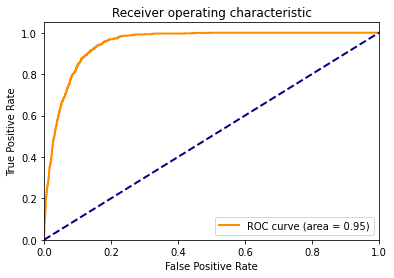

Confusion Matrix:
[[6493  772]
 [ 140  831]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      7265
           1       0.52      0.86      0.65       971

    accuracy                           0.89      8236
   macro avg       0.75      0.87      0.79      8236
weighted avg       0.92      0.89      0.90      8236

#########################################################


In [12]:
model_name = 'LGBMClassifier_bench'
model = lgb.LGBMClassifier(n_jobs=-1)
parameters = param_grids.param_lgbm

random_state = 42
folds = 5
resampling = [0.2, 0.5]

clf_grid, time, test_score, metrics_df = make_model(df_bench, model, parameters, 
                                                            test_size=0.2, folds=folds,
                                                            resampling=resampling)
info_file = f'pres_models_2/{model_name}_info.txt'

with open(info_file, 'w') as f:
        # Write the tuned hyperparameters and accuracy to file
        f.write(f"Tuned Hyperparameters: {clf_grid.best_params_}\n")
        f.write(f"Accuracy: {clf_grid.best_score_}\n")
        # Write training time in minutes to file
        f.write(f"Training Time: {time} minutes\n")
        f.write(f"Test Score: {test_score}\n")
        f.write(f"Metrics: {metrics_df}\n")

metrics_file = f'pres_models_2/{model_name}_metrics.csv'
# Save the metrics dataframe to a CSV file
metrics_df.to_csv(metrics_file, index=False)